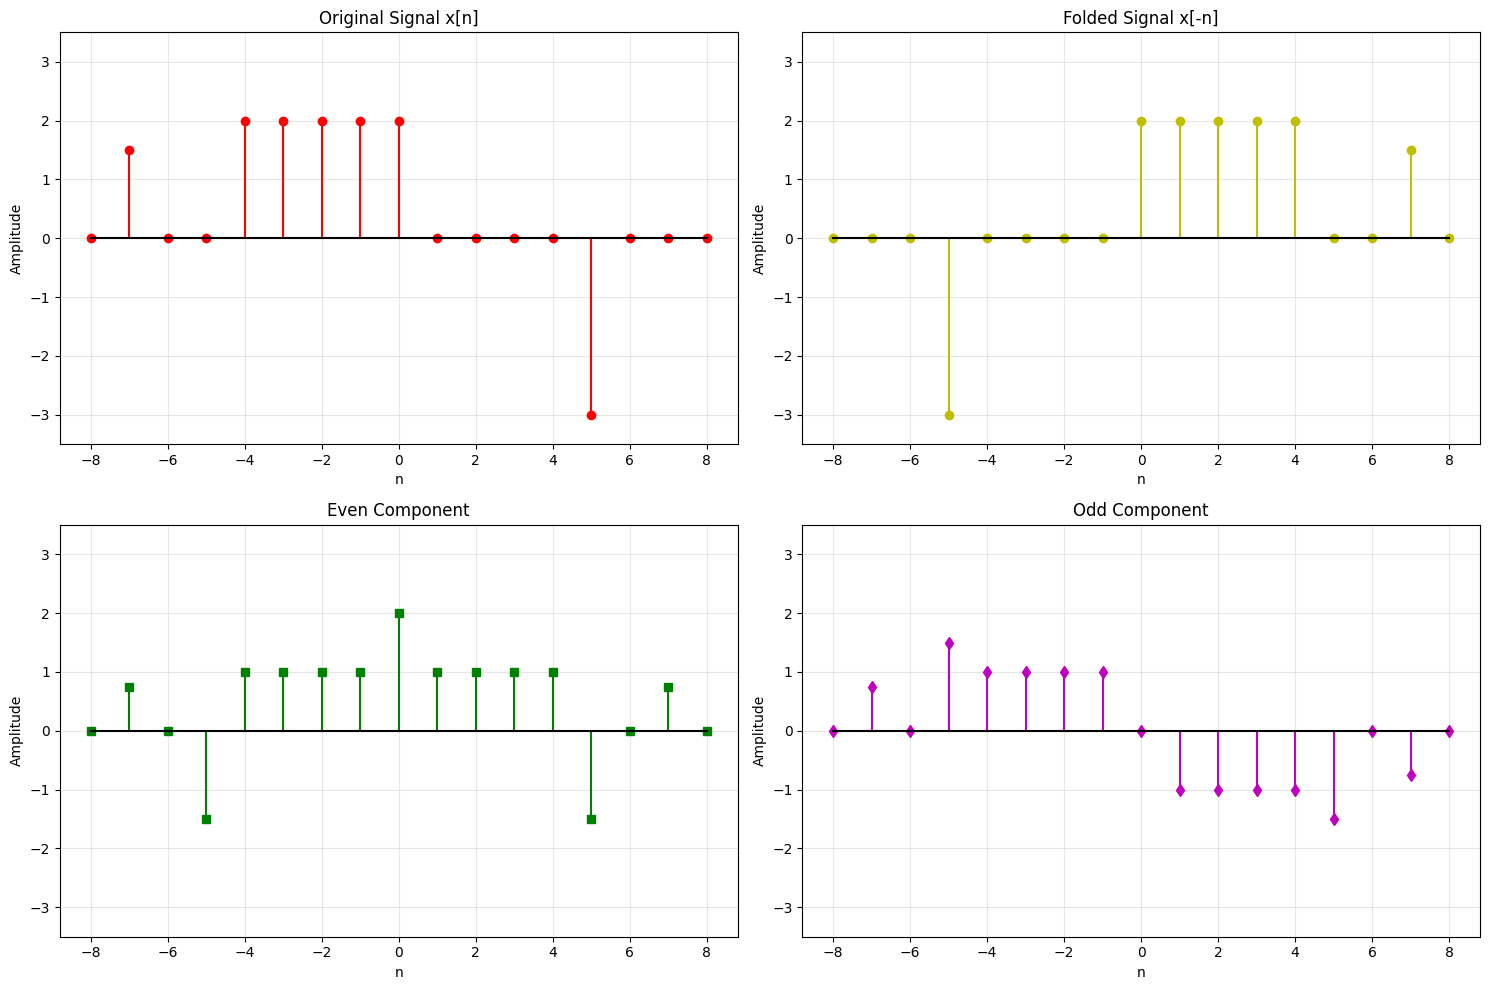

Maximum reconstruction error: 0.00e+00
Even component symmetry check: True
Odd component symmetry check: True


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to fold the signal (x[-n])
def fold_signal(x):
    return x[::-1]

# Function to compute the even component
def even_component(x, x_folded):
    return (x + x_folded) / 2

# Function to compute the odd component
def odd_component(x, x_folded):
    return (x - x_folded) / 2

# Define the range of n (time indices)
n = np.arange(-8, 9)
x = np.zeros_like(n, dtype=float)

# Define a new example signal
x[(n >= -4) & (n <= 0)] = 2.0
x[n == 5] = -3.0
x[n == -7] = 1.5

# Compute folded, even, and odd components
x_folded = fold_signal(x)
x_even = even_component(x, x_folded)
x_odd = odd_component(x, x_folded)

# Plot all signals
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 2, 1)
plt.stem(n, x, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Original Signal x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Folded
plt.subplot(2, 2, 2)
plt.stem(n, x_folded, linefmt='y-', markerfmt='yo', basefmt='k-')
plt.title("Folded Signal x[-n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Even
plt.subplot(2, 2, 3)
plt.stem(n, x_even, linefmt='g-', markerfmt='gs', basefmt='k-')
plt.title("Even Component")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Odd
plt.subplot(2, 2, 4)
plt.stem(n, x_odd, linefmt='m-', markerfmt='md', basefmt='k-')
plt.title("Odd Component")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.ylim(-3.5, 3.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Verification
x_reconstructed = x_even + x_odd
reconstruction_error = np.max(np.abs(x - x_reconstructed))

print(f"Maximum reconstruction error: {reconstruction_error:.2e}")
print(f"Even component symmetry check: {np.allclose(x_even, x_even[::-1])}")
print(f"Odd component symmetry check: {np.allclose(x_odd, -x_odd[::-1])}")
